# Вариант 2-05

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split

from utils import table, load_styles, heatmap, printf
load_styles()

In [29]:
pylab.rcParams['figure.figsize'] = (24.0, 16.0)
plt.rcParams.update({'font.size': 22})

n=500, M=2, K=4


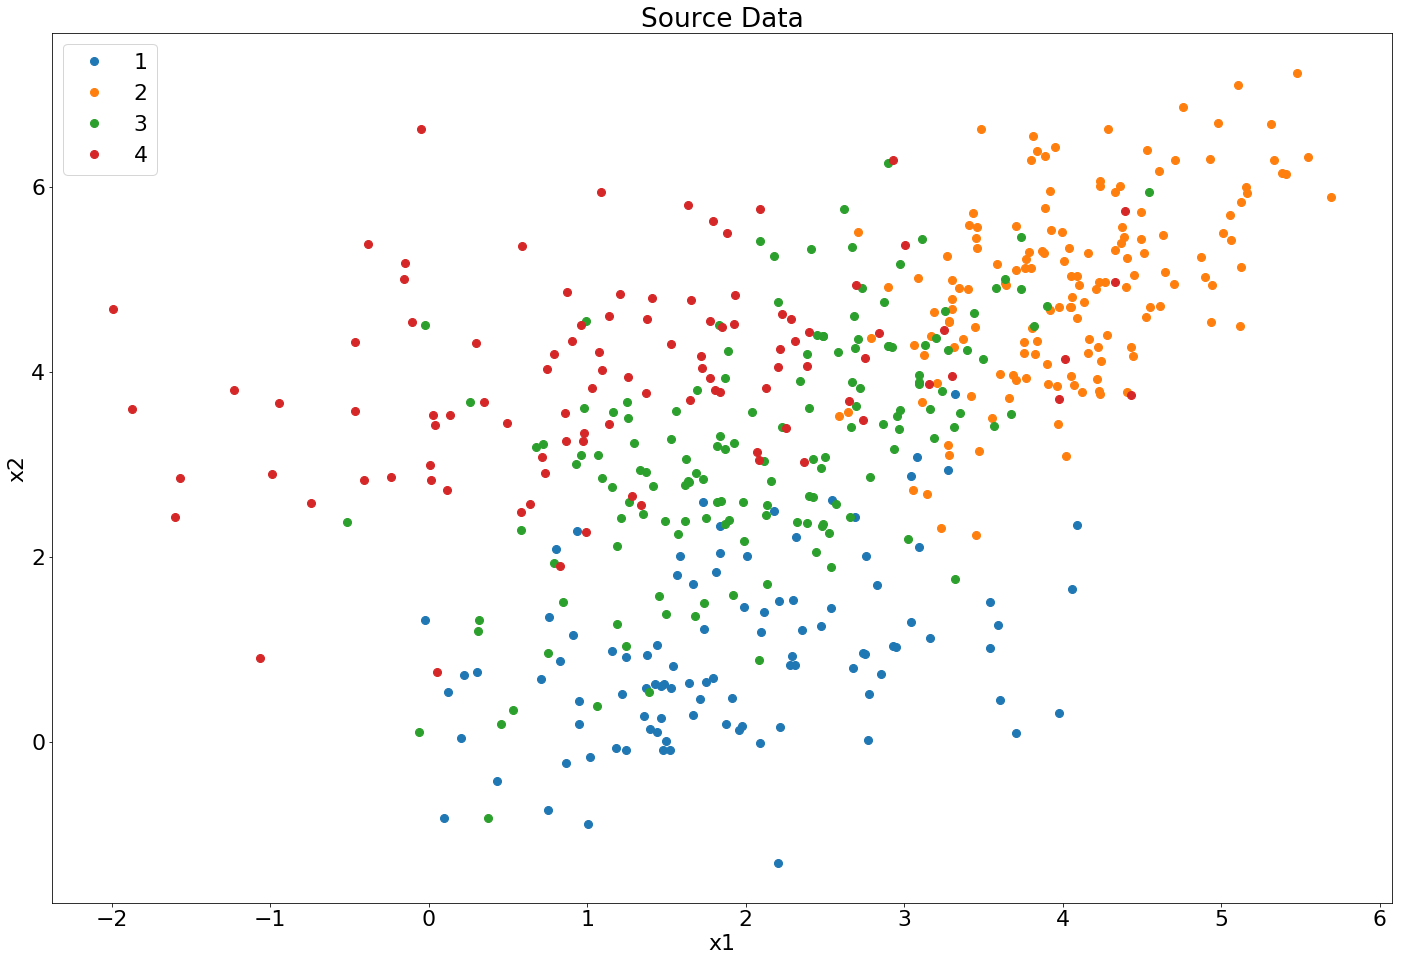

In [26]:
data = pd.read_csv('data.csv', dtype={
    'x1': np.float64,
    'x2': np.float64,
    'label': str
})
sample = data.values
x1    = list(sample[:, 0])
x2    = list(sample[:, 1])
klass = list(sample[:, 2])

class_labels = np.unique(klass)

M = 2
K = len(class_labels)
n = len(x)

split = {}
for label in class_labels:
    split[label] = { 'x1': [], 'x2': [] }

for i in range(len(klass)):
    klass_i = klass[i]
    x1_i = x1[i]
    x2_i = x2[i]
    split[klass_i]['x1'].append(x1_i)
    split[klass_i]['x2'].append(x2_i)

fig, ax = plt.subplots()
ax.set_title('Source Data')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

for label in class_labels:
    plt.plot(split[label]['x1'], split[label]['x2'], 'o', markersize=8, label=label)
    
plt.legend()

print('n={n}, M={M}, K={K}'.format(n=n, M=M, K=K))

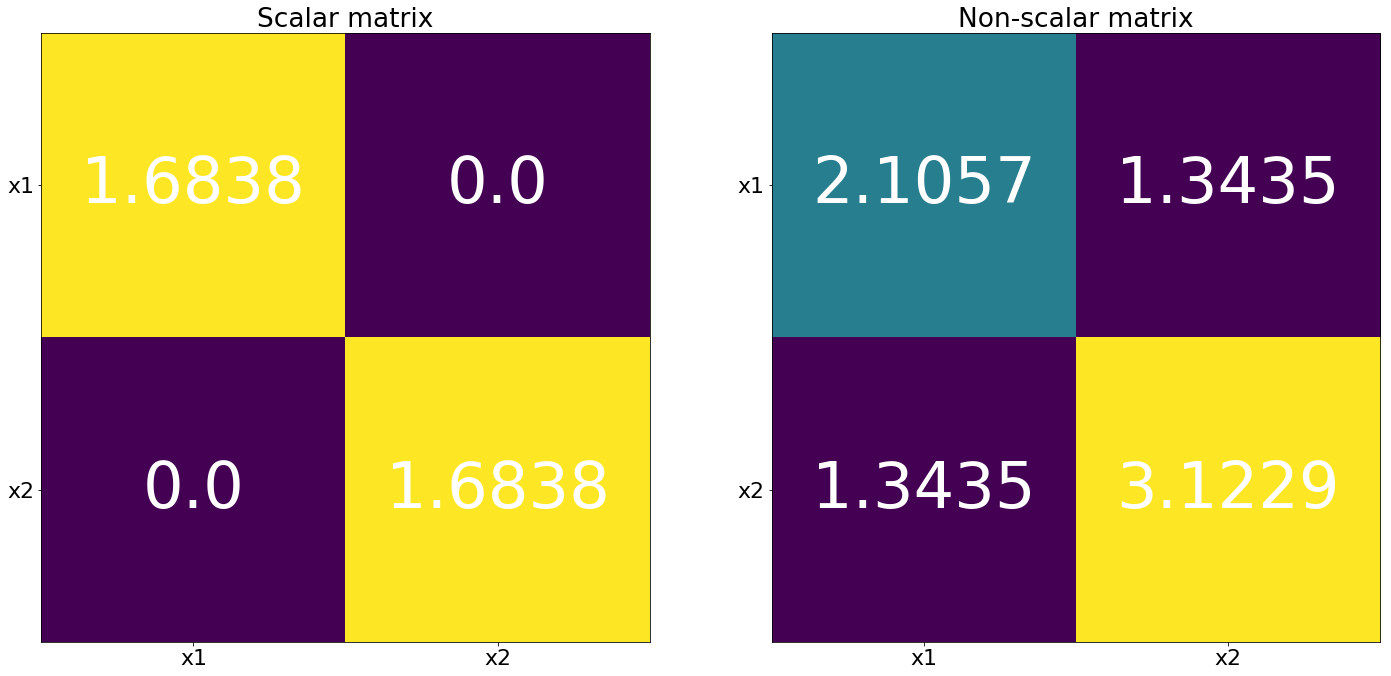

In [32]:
printf('<h2 class="text-center">Same matrices</h2>')

fig, ax = plt.subplots(1, 2)

I = np.identity(2)
sigma = np.std(np.concatenate([x1, x2]), ddof=1)

heatmap(
    np.around(I * sigma, 4),
    canvas=ax[0],
    title='Scalar matrix',
    xlabels=['x1', 'x2'],
    ylabels=['x1', 'x2'],
    digit_size=64
)

heatmap(
    np.around(np.cov([x1, x2]), 4),
    canvas=ax[1],
    title='Non-scalar matrix',
    xlabels=['x1', 'x2'],
    ylabels=['x1', 'x2'],
    digit_size=64
)

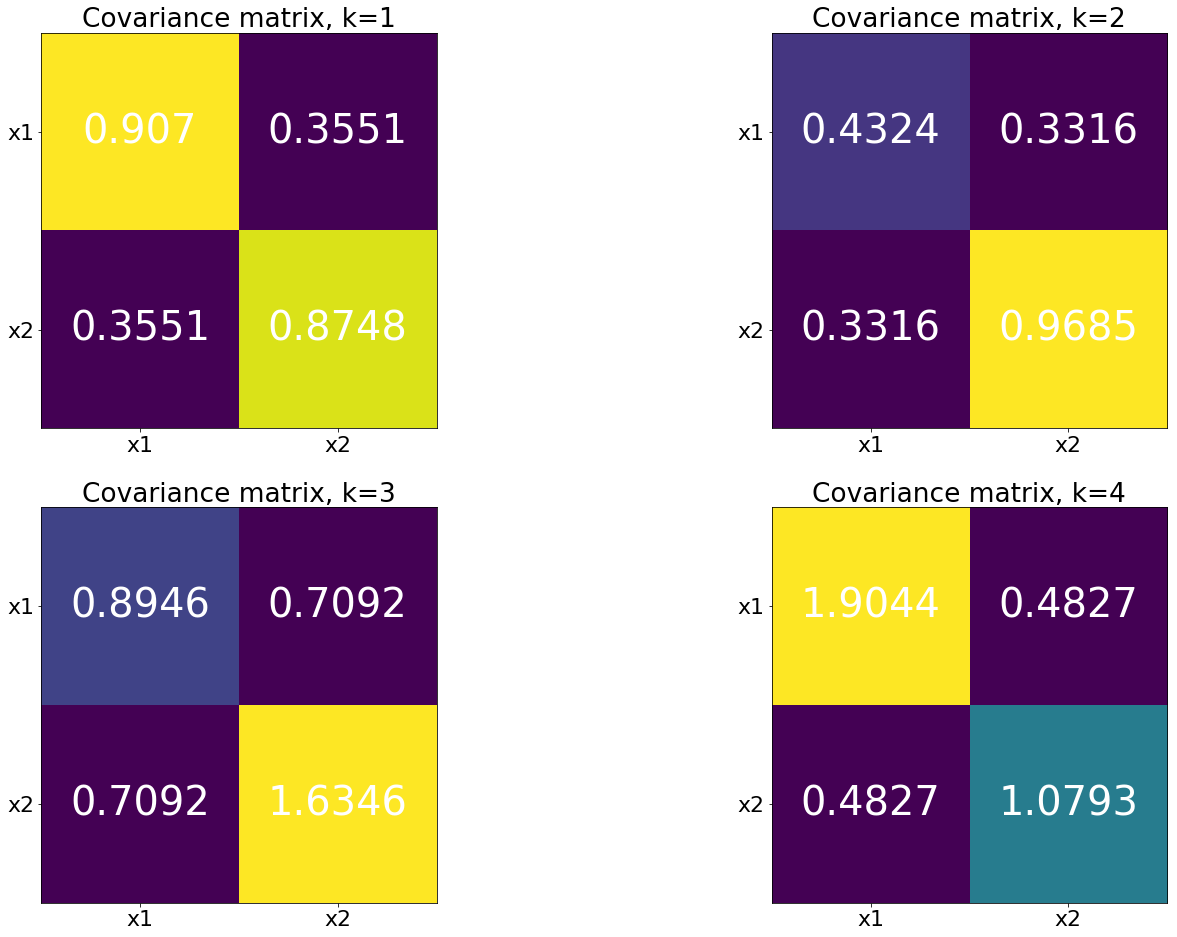

In [33]:
printf('<h2 class="text-center">Different matrices</h2>')

fig, ax = plt.subplots(2, 2)
subplots = [ax[0][0], ax[0][1], ax[1][0], ax[1][1]]

for i in range(K):
    label = class_labels[i]
    canvas = subplots[i]
    data = split[label]
    cov_matrix = np.cov([data['x1'], data['x2']])

    heatmap(
        np.around(cov_matrix, 4),
        xlabels=['x1', 'x2'],
        ylabels=['x1', 'x2'],
        canvas=canvas,
        title='Covariance matrix, k={}'.format(label),
        digit_size=40
    )